In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import svm
from sklearn.metrics import confusion_matrix, f1_score, recall_score, classification_report, precision_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
red = pd.read_csv("/content/winequality-red.csv", sep=";")
red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
white = pd.read_csv("/content/winequality-white.csv", sep = ";")
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
duplicate_red = red[red.duplicated()]
print(duplicate_red.shape)
duplicate_white = white[white.duplicated()]
print(duplicate_white.shape)

(240, 12)
(937, 12)


In [8]:
# check NaN
np.isnan(red).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
np.isnan(white).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'number of ratings')

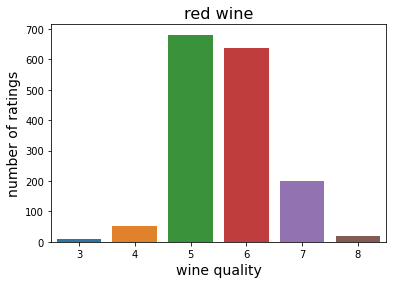

In [10]:
sns.countplot(red['quality'])
plt.title("red wine", fontsize=16.0)
plt.xlabel("wine quality", fontsize=14.0)
plt.ylabel("number of ratings", fontsize=14.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'number of ratings')

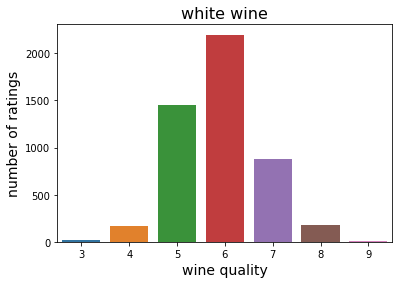

In [11]:
sns.countplot(white['quality'])
plt.title("white wine", fontsize=16.0)
plt.xlabel("wine quality", fontsize=14.0)
plt.ylabel("number of ratings", fontsize=14.0)

In [12]:
reviews_red = []
for i in red['quality']:
    if i >= 1 and i <= 5:
        reviews_red.append(float(0))
    elif i >= 6 and i <= 10:
        reviews_red.append(float(1))
    # elif i >= 8 and i <= 10:
    #     reviews_red.append(float(3))
red['reviews'] = reviews_red

In [13]:
red.drop('quality', inplace=True, axis=1)
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,reviews
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0.0


In [14]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  reviews               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [ ]:
# reviews_white = []
# for i in white['quality']:
#     if i >= 1 and i <= 5:
#         reviews_white.append(float(0))
#     elif i >= 6 and i <= 10:
#          reviews_white.append(float(1))
#     # elif i >= 8 and i <= 10:
#     #     reviews_white.append(float(3))
# white['reviews'] = reviews_white


In [ ]:
# white.drop('quality', inplace=True, axis=1)
# white

In [ ]:
#white['quality'] = white['quality'].apply(lambda x:x-3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


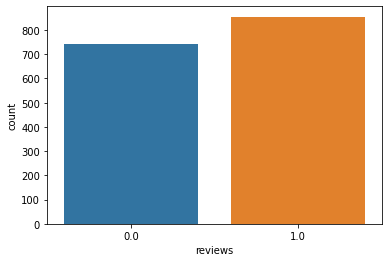

In [15]:
sns.countplot(red['reviews'])
#sns.countplot(red['quality'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


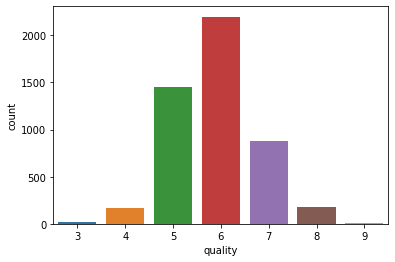

In [16]:
#sns.countplot(white['reviews'])
sns.countplot(white['quality'])

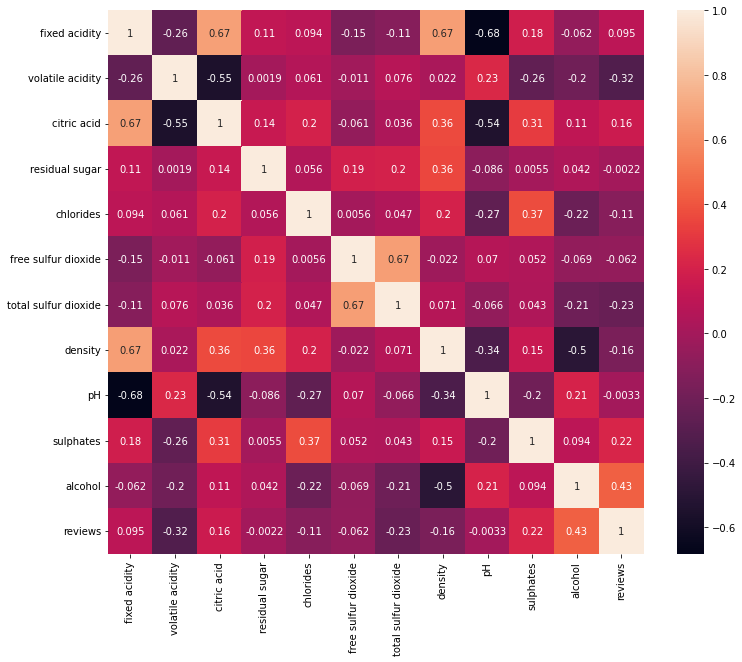

In [17]:
# corelation
red.corr
white.corr
plt.figure(figsize = (12,10))
sns.heatmap(red.corr(), annot = True) 

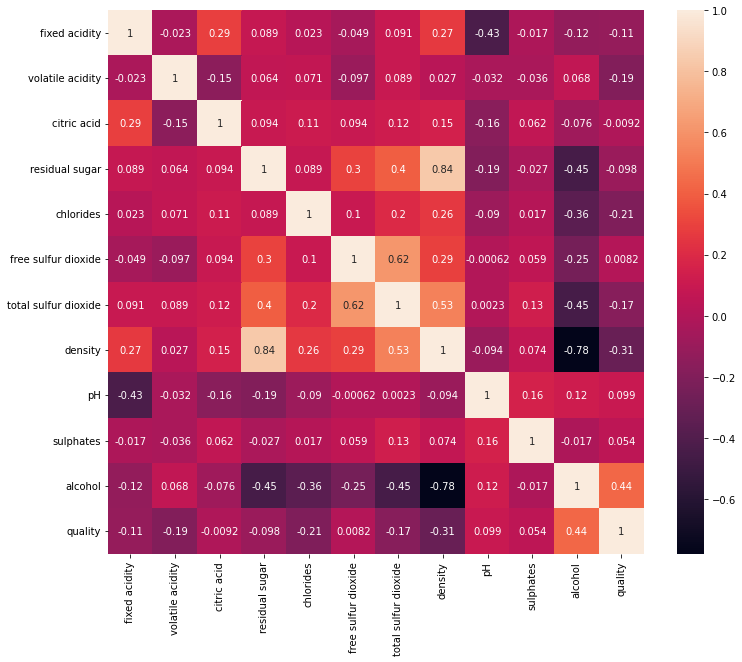

In [18]:
plt.figure(figsize = (12,10))
sns.heatmap(white.corr(), annot = True) 

In [19]:
data_red = red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density', 'free sulfur dioxide', 'total sulfur dioxide',
       'pH', 'sulphates', 'alcohol', 'reviews']]
data_white = white[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density', 'free sulfur dioxide', 'total sulfur dioxide',
       'pH', 'sulphates', 'alcohol', 'quality']]

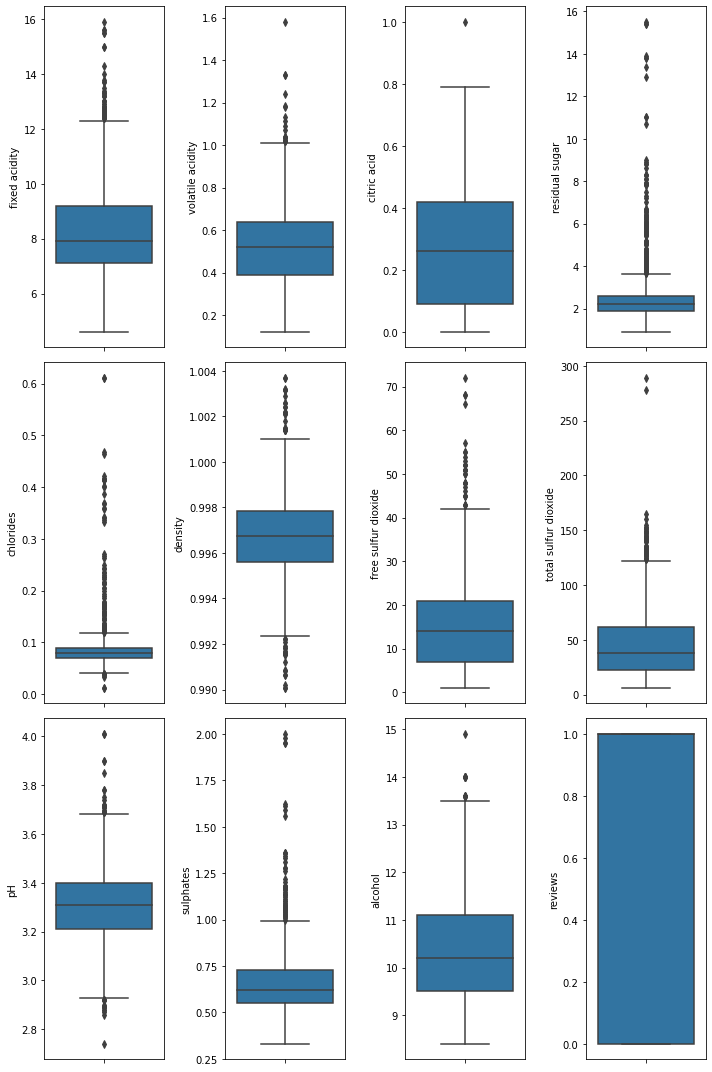

In [21]:
fig,ax = plt.subplots(ncols=4, nrows = 3,figsize =(10,15))

index = 0
ax = ax.flatten()

for col,value in data_red.items():
    if col!='type':
        sns.boxplot(y=col,data=data_red,ax = ax[index])
        index+=1
        plt.tight_layout()
    


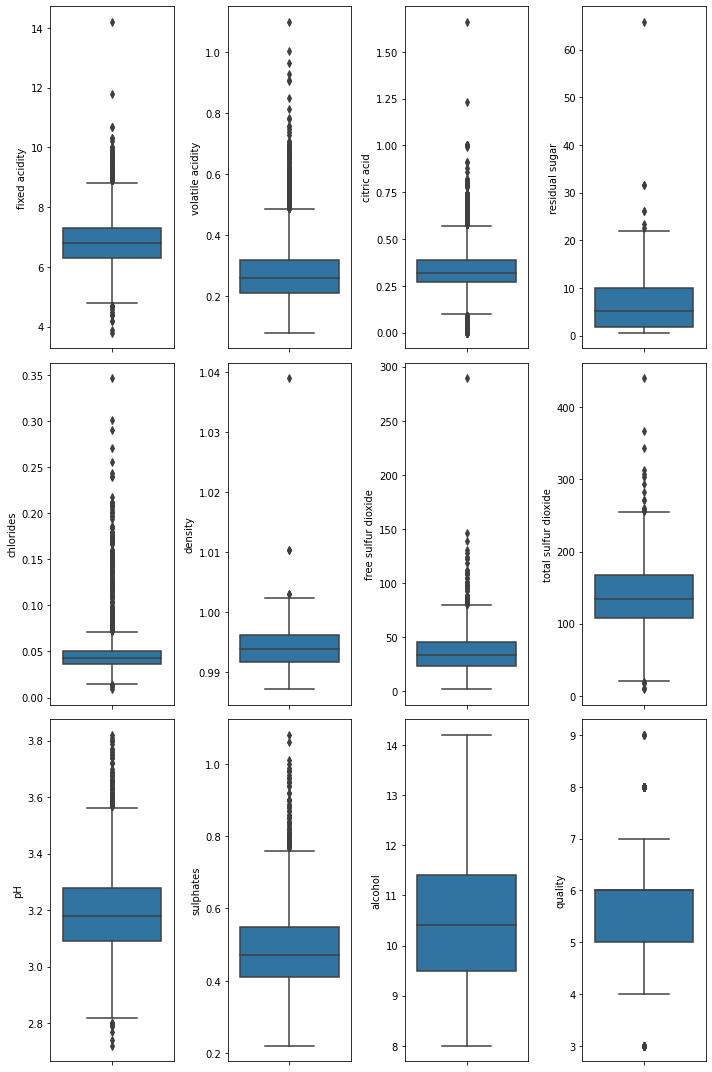

In [22]:
fig,ax = plt.subplots(ncols=4, nrows = 3,figsize =(10,15))

index = 0
ax = ax.flatten()

for col,value in data_white.items():
    if col!='type':
        sns.boxplot(y=col, data = data_white, ax = ax[index])
        index+=1
        plt.tight_layout()
    


In [23]:
x_red = red.iloc[:,:11]
#y_red = red['quality']
y_red = red['reviews']
sc = StandardScaler()
x_red = sc.fit_transform(x_red)

In [24]:
# pca = PCA()
# x_pca_red = pca.fit_transform(x_red)
# plt.figure(figsize=(10,10))
# plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
# plt.ylabel("Percentage explained variance", fontsize=15.0)
# plt.xlabel("Number of principal components", fontsize=15.0)
# plt.grid()

# pca_red = PCA(n_components=8)
# x_new_red = pca_red.fit_transform(x_red)

In [25]:
x_white = white.iloc[:,:11]
y_white = white['quality']
#y_white = white['reviews']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_white = sc.fit_transform(x_white)

In [26]:
# from sklearn.decomposition import PCA
# pca = PCA()
# x_pca_white = pca.fit_transform(x_white)
# plt.figure(figsize=(10,10))
# plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
# plt.ylabel("Percentage explained variance", fontsize=15.0)
# plt.xlabel("Number of principal components", fontsize=15.0)
# plt.grid()
# pca_new_white = PCA(n_components=7)
# x_new_white = pca_new_white.fit_transform(x_white)

# **1. Support Vector Machine - red wine**

In [28]:
x_red = x_red
#y_red = red['quality']
y_red = red['reviews']

x_red_train, x_red_test, y_red_train, y_red_test = train_test_split(x_red, y_red, test_size=0.1, random_state=12)

In [34]:
clf_red  = svm.SVC(kernel="rbf", C= 3)
clf_red.fit(x_red_train, y_red_train)
y_red_clf_pred = clf_red.predict(x_red_test)

In [35]:
def metrics (y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: " + str(accuracy))
  f1 = f1_score(y_test, y_pred, average='weighted') 
  print("F1-score: " + str(f1))
  recall = recall_score(y_test, y_pred, average='weighted')
  print("Recall: " + str(recall))
  conf_mtrx = confusion_matrix(y_test, y_pred)
  class_names = [0,1,2,3,4,5]
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  sns.heatmap(pd.DataFrame(conf_mtrx), annot=True ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion Matrix', y=1.1)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  print(classification_report(y_test, y_pred))

Accuracy: 0.81875
F1-score: 0.8184285714285714
Recall: 0.81875
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80        74
         1.0       0.82      0.85      0.83        86

    accuracy                           0.82       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.82      0.82      0.82       160



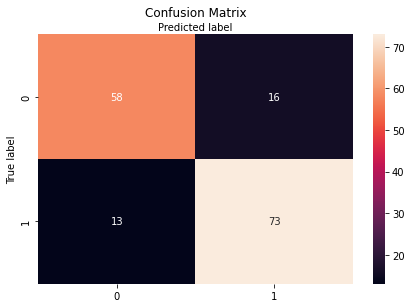

In [36]:
metrics(y_red_test, y_red_clf_pred)

# **2. Random Forest - red wine**

In [37]:
rf_red = RandomForestClassifier(n_estimators=20)
rf_red.fit(x_red_train, y_red_train)
rf_red_predict = rf_red.predict(x_red_test)

Accuracy: 0.85
F1-score: 0.8501176470588236
Recall: 0.85
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84        74
         1.0       0.87      0.85      0.86        86

    accuracy                           0.85       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.85      0.85      0.85       160



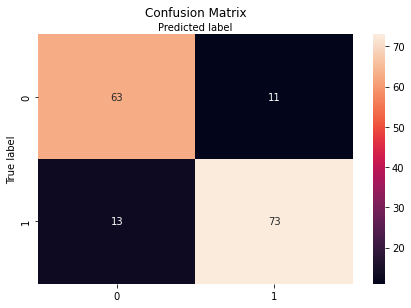

In [38]:
metrics(y_red_test, rf_red_predict)

# **3. Naive Bayes - red wine**

In [39]:
nb_red = GaussianNB()
nb_red.fit(x_red_train,y_red_train)
nb_red_predict = nb_red.predict(x_red_test)

Accuracy: 0.75
F1-score: 0.7484126984126983
Recall: 0.75
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.71        74
         1.0       0.74      0.81      0.78        86

    accuracy                           0.75       160
   macro avg       0.75      0.74      0.75       160
weighted avg       0.75      0.75      0.75       160



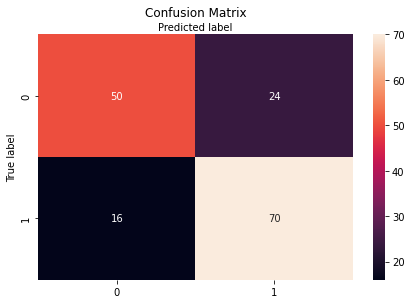

In [40]:
metrics(y_red_test, nb_red_predict)

# **1. SVM - white wine**

In [46]:
x_white = x_white
y_white = white['quality']
#y_white = white['reviews']
x_white_train, x_white_test, y_white_train, y_white_test = train_test_split(x_white, y_white, test_size=0.1, random_state=1)

In [47]:
clf_white  = svm.SVC(kernel="rbf", C= 3)
clf_white.fit(x_white_train, y_white_train)
y_white_clf_pred = clf_white.predict(x_white_test)

Accuracy: 0.5836734693877551
F1-score: 0.5467946946032333
Recall: 0.5836734693877551
              precision    recall  f1-score   support

           4       0.33      0.06      0.10        17
           5       0.66      0.60      0.63       145
           6       0.56      0.80      0.66       221
           7       0.54      0.23      0.32        91
           8       0.00      0.00      0.00        16

    accuracy                           0.58       490
   macro avg       0.42      0.34      0.34       490
weighted avg       0.56      0.58      0.55       490



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


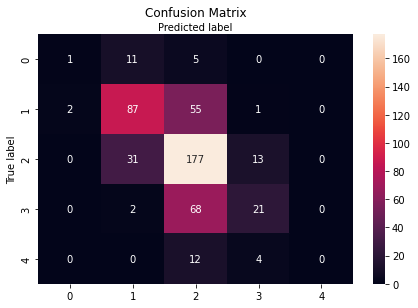

In [48]:
metrics(y_white_test, y_white_clf_pred)

# **2. Random Forest - white wine**

In [52]:
rf_white = RandomForestClassifier(n_estimators=20)
rf_white.fit(x_white_train, y_white_train)
rf_white_predict = rf_white.predict(x_white_test)

Accuracy: 0.6959183673469388
F1-score: 0.690147737024947
Recall: 0.6959183673469388
              precision    recall  f1-score   support

           4       0.60      0.35      0.44        17
           5       0.75      0.68      0.71       145
           6       0.66      0.81      0.73       221
           7       0.72      0.57      0.64        91
           8       1.00      0.38      0.55        16

    accuracy                           0.70       490
   macro avg       0.75      0.56      0.61       490
weighted avg       0.71      0.70      0.69       490



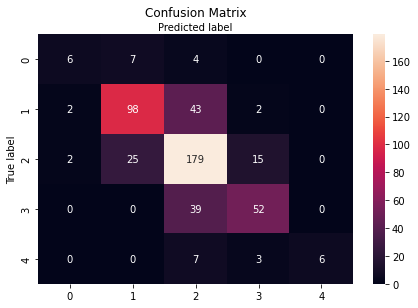

In [53]:
metrics(y_white_test, rf_white_predict)

# **3. Naive Bayes - white wine**

In [55]:
nb_white = GaussianNB()
nb_white.fit(x_white_train,y_white_train)
nb_white_predict = nb_white.predict(x_white_test)

Accuracy: 0.44693877551020406
F1-score: 0.43372443939231253
Recall: 0.44693877551020406


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.25      0.24      0.24        17
           5       0.51      0.53      0.52       145
           6       0.53      0.33      0.40       221
           7       0.37      0.73      0.49        91
           8       0.00      0.00      0.00        16

    accuracy                           0.45       490
   macro avg       0.27      0.30      0.28       490
weighted avg       0.46      0.45      0.43       490



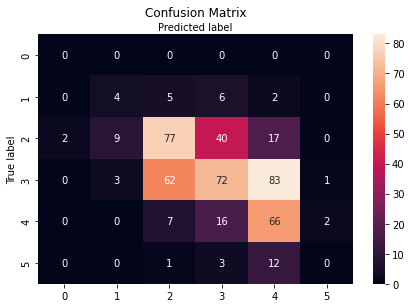

In [56]:
metrics(y_white_test, nb_white_predict)